# Titanic Survival

#### The challenge:

Build a predictive model that answers the question: "what sorts of people were more likely to survive the Titanic sinking?

In [1]:
# data analysis and wrangling
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# machine learning
from sklearn.linear_model import LogisticRegression

In [2]:
# Acquiring the data
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
combine = [train_df, test_df]

In [3]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [4]:
# find if age is continuous or discrete
print(train_df['Age'].unique())

[22.   38.   26.   35.     nan 54.    2.   27.   14.    4.   58.   20.
 39.   55.   31.   34.   15.   28.    8.   19.   40.   66.   42.   21.
 18.    3.    7.   49.   29.   65.   28.5   5.   11.   45.   17.   32.
 16.   25.    0.83 30.   33.   23.   24.   46.   59.   71.   37.   47.
 14.5  70.5  32.5  12.    9.   36.5  51.   55.5  40.5  44.    1.   61.
 56.   50.   36.   45.5  20.5  62.   41.   52.   63.   23.5   0.92 43.
 60.   10.   64.   13.   48.    0.75 53.   57.   80.   70.   24.5   6.
  0.67 30.5   0.42 34.5  74.  ]


In [5]:
# preview  the data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Features categóricas

**Categóricas:** Survived, Sex, Cabin, Embarked.  
**Categóricas ordinales:** PClass.  

#### Features numéricas

**Continuas:** Edad, Fate.  
**Discretas:** SibSp, Parch  

#### Features mixtas

**Ticket** es una mezcla de tipos de datos numéricos y alfanuméricos  
**Cabin** es alfanumérico  

#### Features que podrían contener erorres ortográficos o tipográficos

**Name**, debido a que hay varias formas de describir un nombre (títulos, corchetes y comillas para nombres alternativos o abreviados)

In [6]:
print('train info')
train_df.info()
print('-'*40)
print('test info')
test_df.info()

train info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
----------------------------------------
test info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -

#### Distribución de valores de features numéricas en las muestras

Hechos relevantes:  

- Survived es una variable categórico con valores 0 y 1
- En este dataset hay un total de 891 pasajeros. El número real de pasajeros del Titanic era de 2223 personas.
- Aproximadamente el 38% de pasajeros (en el dataset) sobrevivieron al hundimiento.
- La gran mayoría de pasajeros (>75%) no tienen ni padres ni hijos
- Cerca del 25% de pasajeros tienen esposa o hermanos a bordo.

In [7]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Distribución de las features categóricas

- Los nombres son únicos en todo el conjunto de datos (count=unique=891).
- La variable Sex tiene 2 valores únicos. Con 65% siendo hombres (top=male, freq=577/count=891).
- Los valores Cabin tienen varios duplicados en las muestras. Alternativamente, varios pasajeros compartieron una cabina.
- La variable Embarked tiene 3 posibles valores: El puerto S fue usado por la mayoría de pasajeros (top=S).
- La característica Ticket tiene una alta proporción (22%) de valores duplicados (unique=681).

### Supuestos basados en el análisis de datos.

#### Correlación

Queremos saber que tan correlacionadas están las variables con Survived. Se quiere hacer esto al principio del proyecto y hacer coincidir estas correlaciones rápidas con correlaciones modeladas más adelante en el proyecto.

#### Completando

1. Es posible que se desee completar la función Age, ya que definitivamente está correlacionada con la superviviencia (niños primero).
2. Es posible que deseemos completar la función Embarked, ya que también puede llegar a estar correlacionada con la supervivencia u otra función importante.

#### Corrigiendo

**Variables que podrían ser eliminadas:**
1. Ticket: Alta proporción de datos duplicados (22%). Posiblemente no haya correlación entre Ticket y Survived.
2. Cabin: Contiene muchos valores nulos en el test set y en el training set.
3. PassengerID: Nada que ver con Survived.
4. Name: No contribuye directamente a Survived.

#### Creando

**Tal vez se quieran crear las siguientes variables:**
1. Family: Basado en las variables Parch y SibSp para obtener el número total de miembros de la familia a bordo.
2. Title: Extraído de la variable Name.
3. Age bands: Para convertir una variable numérica continua a una variable categórica ordinal.
4. Fare range: Podría ayudar a nuestro análisis.

#### Clasificando

**Podemos añadir a nuestras suposiciones, en base a la descripción del problema mencionada anteriormente:**
1. Mujeres (Sex=female) tenían mayores probabilidades de sobrevivir.
2. Niños (Age<?) tenían mayores probabilidades de sobrevivir.
3. Los pasajeros de primera clase (Pclass=1) tenían mayores probabilidades de sobrevivir.

In [15]:
# Visualiza las variables de tipo objeto
train_df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Hagland, Mr. Ingvald Olai Olsen",male,1601,C23 C25 C27,S
freq,1,577,7,4,644


## Análisis agrupando features

**Pclass**. Observamos una correlación significativa (>0.5) entre Pclass=1 y Survived.

Se decide incluir esta característica en nuestro modelo.

In [21]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


**Sex**. Observamos una correlación significativa (74%) entre Sex=female y Survived.

In [24]:
train_df[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


**SibSp y Parch**. Estas características tienen cero correlación para ciertos valores.

Podría mejor derivar una característica o un conjunto de características de estas características individuales

In [25]:
train_df[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [26]:
train_df[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


## Análisis visualizando datos

#### Correlacionando features numéricas

Entendamos correlaciones entre features numéricas y la variable objetivo (Survived)

Un histograma es útil para analizar variables numéricas continuas como Age, donde los rangos ayudarán a identificar patrones útiles.

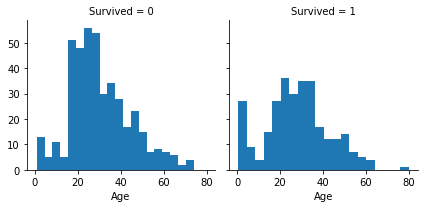

In [32]:
g = sns.FacetGrid(train_df, col='Survived')
g.map(plt.hist, 'Age', bins=20)

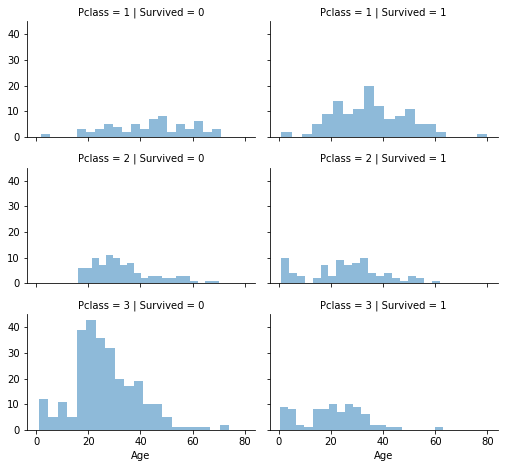

In [39]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend()

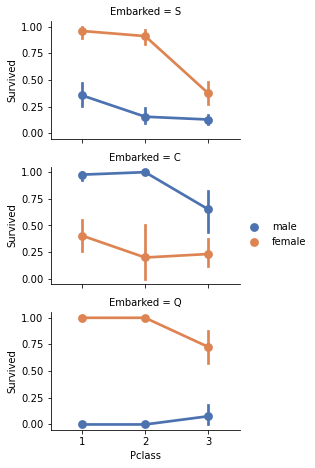

In [43]:
grid = sns.FacetGrid(train_df, row='Embarked', height=2.2, aspect=1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None, palette='deep')
grid.add_legend()

## Modelación

In [9]:
# y = num['Survived']
# X = num.drop(['Survived'], axis=1)
# X.head(1)

In [10]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)

In [11]:
# print(len(X))
# print(len(X_train))
# print(len(X_test))

In [12]:
from sklearn.linear_model import Lasso

#model = Lasso()

In [13]:
# Se entrena el modelo
#model.fit(X_train, y_train)